<a href="https://colab.research.google.com/github/maxotuteye/MLandAI/blob/main/NEMO!!!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

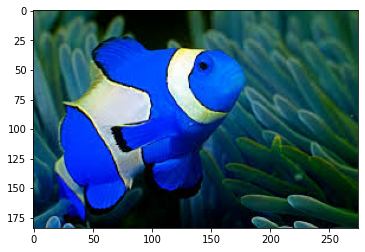

In [ ]:
nemo = cv2.imread('nemo0.jpg')
plt.imshow(nemo)
plt.show()

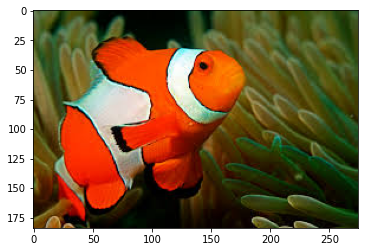

In [ ]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

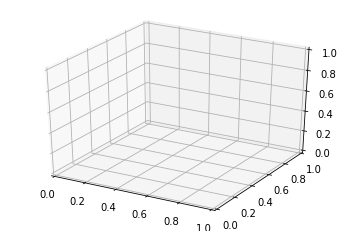

In [ ]:
r, g, b = cv2.split(nemo)
fig = plt.figure()
axis = fig.add_subplot(1,1,1, projection="3d")

In [ ]:
pixel_colors = nemo.reshape((np.shape(nemo)[0] * np.shape(nemo)[1], 3))
norm = colors.Normalize(vmin=-1, vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

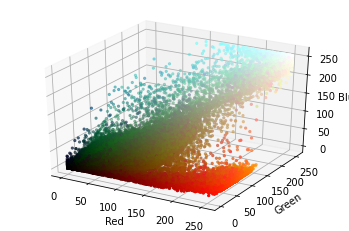

In [ ]:
fig = plt.figure()
axis = fig.add_subplot(1,1,1, projection="3d")
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

In [ ]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

In [ ]:
h,s,v = cv2.split(hsv_nemo)

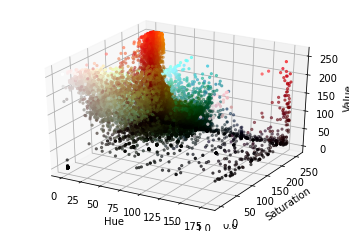

In [ ]:
fig = plt.figure()
axis = fig.add_subplot(1,1,1, projection="3d")
axis = fig.add_subplot(1,1,1, projection="3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [ ]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

In [ ]:
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0

do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

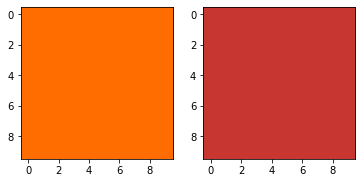

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [ ]:
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)

In [ ]:
result = cv2.bitwise_and(nemo, nemo, mask=mask)

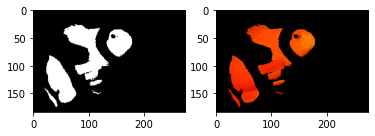

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [ ]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

In [ ]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

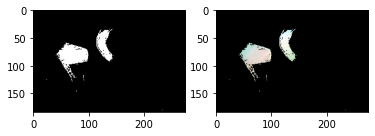

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.show()

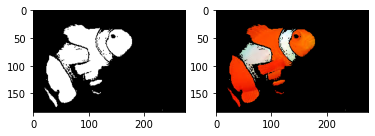

In [ ]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap = "gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.show()

In [ ]:
nemos_friends = []
for i in range(6):
  friend = cv2.cvtColor(cv2.imread("nemo" + str(i) + ".jpg"),
                        cv2.COLOR_BGR2RGB)
  nemos_friends.append(friend)

In [ ]:
def segment_fish(image):
  hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
  light_orange = (1, 190, 200)
  dark_orange = (18, 255, 255)

  mask = cv2.inRange(hsv_image, light_orange, dark_orange)

  light_white = (0,0,200)
  dark_white=(145, 60, 255)
  mask_white = cv2.inRange(hsv_image, light_white, dark_white)
  final_mask = mask + mask_white
  result = cv2.bitwise_and(image, image, mask=final_mask)

  blur = cv2.GaussianBlur(result, (5, 5), 0)
  return blur

In [ ]:
results = [segment_fish(friend) for friend in nemos_friends]

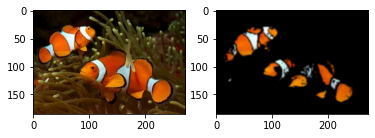

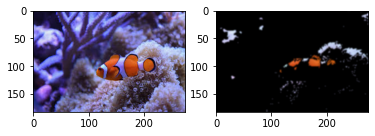

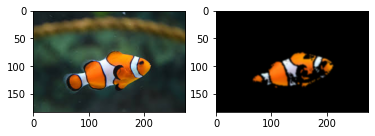

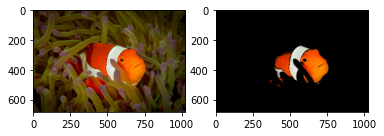

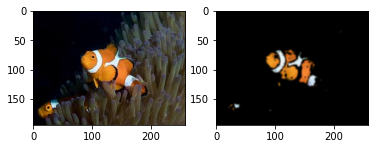

In [ ]:
for i in range(1, 6):
  plt.subplot(1, 2, 1)
  plt.imshow(nemos_friends[i])
  plt.subplot(1, 2, 2)
  plt.imshow(results[i])
  plt.show()